<a href="https://colab.research.google.com/github/naoya1110/al_robotics_lab_2023_hands_on/blob/main/Week03_supplemental_PyTorch_Simple_Linear_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is supplemental material for Week 03, explaining how model parameters are optimized using the stochastic gradient descent (SGD) method.

In this example, we will implement a simple linear regression model with PyTorch.

First, let's import the PyTorch, NumPy, and Matplotlib packages.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Here, we create a dataset consisting of $x$ (inputs) and $y$ (outputs) using a simple linear equation below. It's important to note that the output data y contains some random noise.

$y = 5x + 3 + \mathrm{noise}$

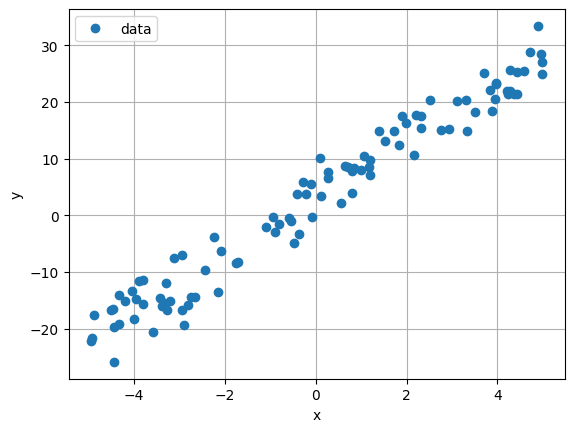

In [2]:
x = 10*np.random.rand(100)-5
noise = 3*np.random.randn(x.shape[0])
y = 5*x + 3 + noise
plt.plot(x, y, marker="o", lw= 0, label="data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

Our objective is to discover a linear function model (equation) that can effectively capture the relationship between the $x$ and $y$ dataset.

In fact, instead of employing PyTorch, we can use `np.polyfit()` to fit the dataset. This allows us to acquire the fitting parameters $w$ and $b$ for the linear function $y = wx + b$, where $w$ and $b$ are referred to as the weight and bias, respectively."

In [4]:
w, b = np.polyfit(x, y, 1)
print(f"w={w:.3f}, b={b:.3f}")

w=4.993, b=3.055


Due to the presence of noise in the $x-y$ dataset, the obtained values of $w$ and $b$ may not match the exact values used to create the dataset. Nevertheless, they are typically close enough to allow us to create a fitting line using these parameters.

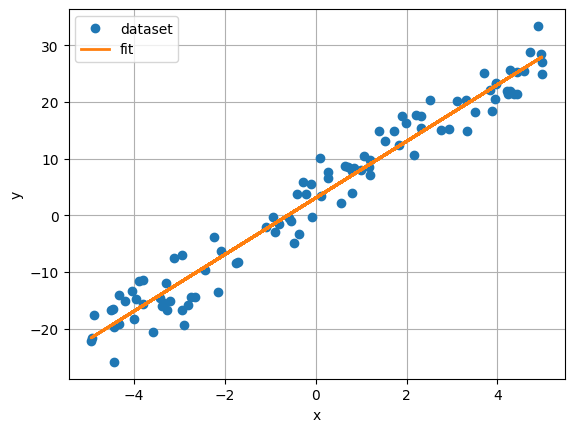

In [5]:
y_fit = w*x + b

plt.plot(x, y, marker="o", lw=0, label="dataset")
plt.plot(x, y_fit, lw=2, label="fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

While `np.polyfit()` works effectively, in this example, we will achieve the same outcome using PyTorch.

Let's start by converting the $x$ and $y$ dataset into `torch.tensor` objects.

In [6]:
x = torch.tensor(x)
y = torch.tensor(y)

print(type(x))
print(type(y))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


Next, we define a function called `model()` that predicts the output value `y` based on an input value `x` using the parameters `w` and `b`.

In [10]:
def model(x):
    return w*x + b

We also define a function called `loss_func()` to calculate the mean squared error between `p` and `y`, where `p` represents the output values (predictions) of the `model()`. This type of function is referred to as a loss function, which helps measure the degree of error in the model's predictions.

$\displaystyle \mathrm{loss} = \mathrm{mse}(p, y) = \frac{1}{N}\sum_{i=0}^{N-1}(p_i-y_i)^2$

In [7]:
def loss_func(p, y):
    return ((p-y)**2).mean()

At this stage, we haven't determined the values of `w` and `b` yet. Therefore, we initialize these values with arbitrary numbers.

In [8]:
w = torch.tensor(1.0, requires_grad=True)   # you can set any number here
b = torch.tensor(-5.0, requires_grad=True)  # you can set any number here

Now, we can make a prediction using `model()`

In [11]:
p = model(x)
print(p)

tensor([-5.0993, -7.0781, -5.9399, -8.2196, -3.0155, -2.0720, -4.1483, -0.5680,
        -8.9036, -0.7927, -9.0378, -6.7036, -3.2738, -1.6865, -3.8066, -1.6773,
        -0.7169, -5.4898, -0.0270, -5.4163, -6.7580, -7.9547, -1.2891, -8.7983,
        -9.9267, -3.0992, -2.6785, -9.3294, -5.2924, -9.5022, -8.3004, -9.9484,
        -1.0344, -4.9088, -5.3692, -8.1276, -4.2877, -3.6134, -6.0873, -0.7205,
        -7.6555, -5.8124, -7.9564, -1.5032, -8.9700, -8.5778, -1.1262, -9.4512,
        -8.8071, -5.0760, -1.1745, -9.4594, -8.9964, -4.7326, -0.0348, -7.2315,
        -8.3445, -9.1989, -8.2738, -9.8733, -0.0200, -1.0608, -3.8091, -3.9959,
        -2.2536, -7.8217, -4.3676, -0.4106, -0.5780, -9.4437, -0.6308, -0.1040,
        -5.5492, -7.8965, -3.4693, -4.1966, -0.2783, -7.1506, -5.5843, -4.4408,
        -7.4384, -3.1769, -3.9329, -8.3782, -7.7526, -4.2021, -1.8882, -4.8868,
        -2.4948, -4.7355, -9.3288, -2.6840, -3.8183, -2.7985, -8.4387, -2.8472,
        -5.8984, -5.2201, -1.0304, -0.77

Let's visualize the current prediction. Since we've initialized `w` and `b` with arbitrary numbers, it's expected that the model's prediction won't fit the data well.

Text(0, 0.5, 'y')

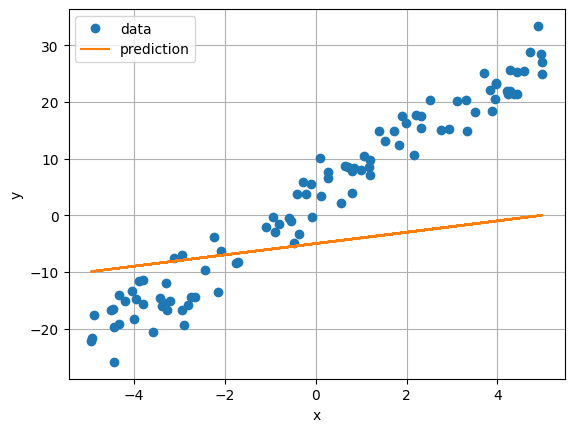

In [12]:
plt.plot(x, y, marker="o", lw=0, label="data")
plt.plot(x, p.detach().numpy(), label="prediction")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

Next, we calculate the loss value (mean squared error) using `loss_func()`. It's important to note that the loss value will be very large because `w` and `b` are arbitrary values and have not been optimized yet.

In [13]:
loss = loss_func(p, y)
print(loss)

tensor(226.8761, dtype=torch.float64, grad_fn=<MeanBackward0>)


To optimize `w` and `b`, we must determine the gradients of the loss with respect to the current values of `w` and `b`. This can be achieved using `loss.backward()`. The gradients, denoted as $\displaystyle \frac{\partial \mathrm{loss}}{\partial w}$ and $\displaystyle \frac{\partial \mathrm{loss}}{\partial b}$, can be accessed via `w.grad` and `b.grad`, respectively.

In [14]:
loss.backward()
print(w.grad)
print(b.grad)

tensor(-75.8003)
tensor(-16.2895)


We can update `w` and `b` using the following equations, where $\eta$ represents the learning rate. This method is known as stochastic gradient descent (SGD):

$\displaystyle w := w - \eta\frac{\partial}{\partial w}\mathrm{loss}$

$\displaystyle b := b - \eta\frac{\partial}{\partial b}\mathrm{loss}$

When updating these values, we don't want to compute gradients. To achieve this, we use with `torch.no_grad()` at the beginning.

In [15]:
lr = 0.01    # define learning rate

with torch.no_grad():    # disable gradients calculations
    w -= w.grad*lr       # update w
    b -= b.grad*lr       # update b

At this stage, you'll notice that the values of `w` and `b` are closer to their true values ($w$=5.0, $b$=3.0) compared to the initial values.

In [16]:
print(w)
print(b)

tensor(1.7580, requires_grad=True)
tensor(-4.8371, requires_grad=True)


To further optimize `w` and `b`, we repeat the above process multiple times.

In [20]:
w = torch.tensor(1.0, requires_grad=True)   # you can set any number here
b = torch.tensor(-5.0, requires_grad=True)  # you can set any number here

lr = 0.005    # learning rate
epochs = 100  # how many times we repeat training

w = torch.tensor(3.0, requires_grad=True)    # initialize w
b = torch.tensor(-1.0, requires_grad=True)   # initialize b

# empty lists for saving loss, w, b
loss_list = []
w_list = []
b_list = []

for epoch in range(epochs):

    p = model(x)              # prediction
    loss = loss_func(p, y)    # measure loss
    loss.backward()           # determine gradients

    with torch.no_grad():     # disable autograd
        w -= w.grad*lr        # update w
        b -= b.grad*lr        # update b

        w.grad.zero_() # reset gradient
        b.grad.zero_() # reset gradient

    # save loss, w, b
    loss_list.append(loss.item())
    w_list.append(w.item())
    b_list.append(b.item())

    print(f"Epoch {epoch+1}, loss={loss.item():.3f}, w={w.item():.3f}, b={b.item():.3f}")

Epoch 1, loss=64.262, w=3.189, b=-0.959
Epoch 2, loss=57.109, w=3.360, b=-0.918
Epoch 3, loss=51.190, w=3.516, b=-0.878
Epoch 4, loss=46.286, w=3.656, b=-0.839
Epoch 5, loss=42.214, w=3.783, b=-0.799
Epoch 6, loss=38.826, w=3.898, b=-0.761
Epoch 7, loss=36.000, w=4.003, b=-0.722
Epoch 8, loss=33.635, w=4.097, b=-0.684
Epoch 9, loss=31.649, w=4.183, b=-0.647
Epoch 10, loss=29.976, w=4.260, b=-0.609
Epoch 11, loss=28.559, w=4.330, b=-0.573
Epoch 12, loss=27.354, w=4.393, b=-0.536
Epoch 13, loss=26.323, w=4.451, b=-0.500
Epoch 14, loss=25.435, w=4.503, b=-0.465
Epoch 15, loss=24.667, w=4.550, b=-0.429
Epoch 16, loss=23.996, w=4.593, b=-0.394
Epoch 17, loss=23.407, w=4.631, b=-0.360
Epoch 18, loss=22.885, w=4.666, b=-0.325
Epoch 19, loss=22.419, w=4.698, b=-0.292
Epoch 20, loss=22.000, w=4.726, b=-0.258
Epoch 21, loss=21.620, w=4.752, b=-0.225
Epoch 22, loss=21.273, w=4.776, b=-0.192
Epoch 23, loss=20.953, w=4.797, b=-0.160
Epoch 24, loss=20.657, w=4.816, b=-0.127
Epoch 25, loss=20.380, w=

As you can see now, `w` is now close to 5.0, and `b` is close to 3.0.

Let's visualize how the loss value has decreased.

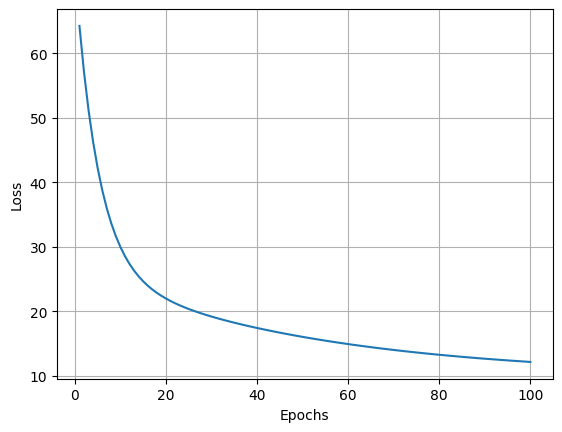

In [21]:
plt.plot(np.arange(epochs)+1, loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()

Let's visualize how the `w` value has changed.

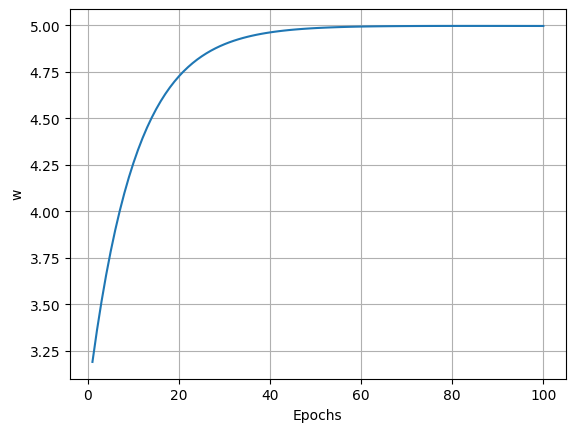

In [22]:
plt.plot(np.arange(epochs)+1, w_list)
plt.xlabel("Epochs")
plt.ylabel("w")
plt.grid()

Let's visualize how the `b` value has changed.

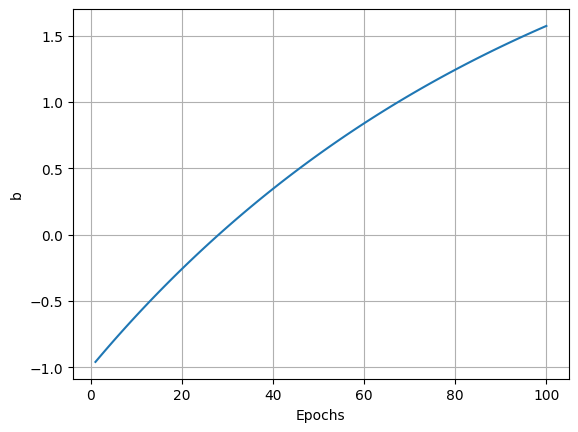

In [23]:
plt.plot(np.arange(epochs)+1, b_list)
plt.xlabel("Epochs")
plt.ylabel("b")
plt.grid()

With the optimized values of `w` and `b`, the model fits the dataset very well.

Text(0, 0.5, 'y')

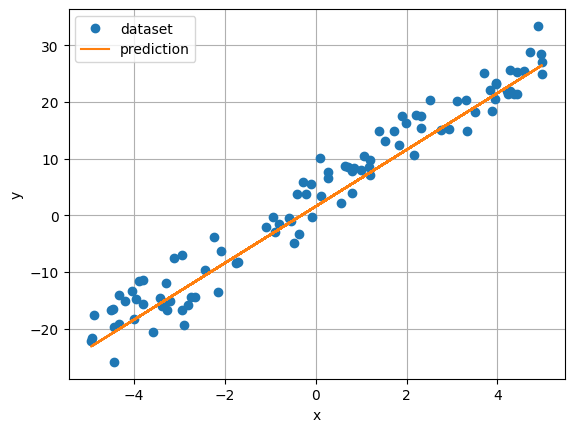

In [24]:
plt.plot(x, y, marker="o", lw=0, label="dataset")
plt.plot(x, p.detach().numpy(), label="prediction")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

Now you can try to change initial values of `epochs`, `lr`, `w`, `b` etc., and let's observe the results.